<a href="https://colab.research.google.com/github/VincentWangzilu/LeagueofLegends/blob/main/League_of_Legends_10_Min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legaue of Legends Project: Predict the Outcome of a Game in the First 10 Minutes


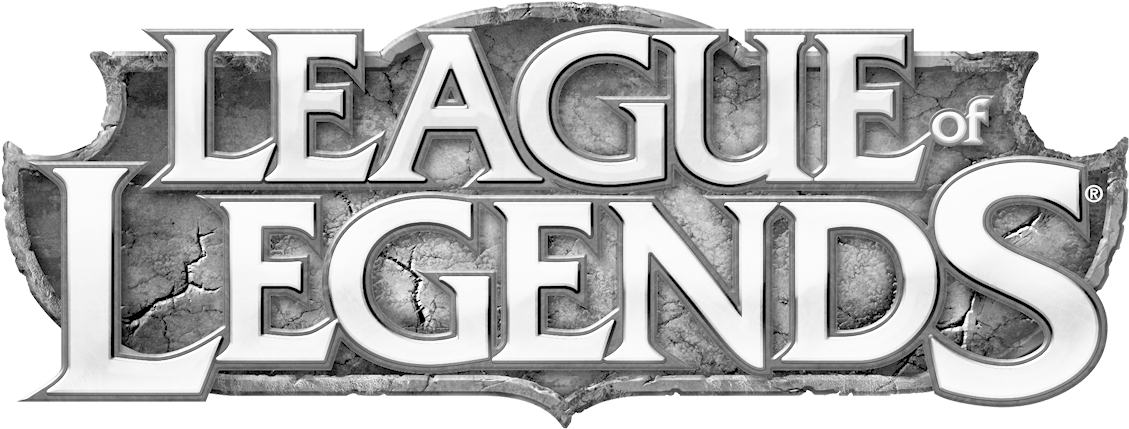

# 1. Introduction
League of Legends is a Multiplayer Online Battle Arena (MOBA). A standard game consists of two teams of five players, each fighting to push their way to their opponent’s base and destroy the building at its center, called the Nexus. 

There are currently 12 international professional leagues in League of Legends. Each league is zone specific and has its own collection of teams, who compete during the annual season to qualify for the League of Legends World Championship. The championship event consistently draws almost 100-million viewers worldwide, which makes it the most popular esport event in the world.

League of Legends is a game that requires lots of teamwork and strategy. In order to purchase more powerful items, players need to kill minions and enemy players in lane in order to collect gold and grow level. There are also elite monsters that will give players extra buff, but killing these elite monsters requires extra time and health. 

The dataset we will be using for this project was published by michel's fanboi at Kaggle.com. The author fetched the game data at 10-min mark using Riot's API. For more detailed information reagarding this datset, click the link down below: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

First, we will load the data and take a look at the overview of this dataset to see if any data cleaning is needed. Then we are going to perform exploratory analysis to this dataset including statistical analysis and data visualization. In the next step, we will start building our machine learning model to predict the outcome of the game. We will feed organized data into machine learning models and measuring base line performance scores. Based on the base line performance score, we will then do feature engineering and parameter tuning to further increase the performance of the algorithm. 

# 2. Loading the Data

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import types
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/high_diamond_ranked_10min.csv'
df = pd.read_csv(path)

In [188]:
print('The dimension of this dataset is: ' + str(df.shape))

The dimension of this dataset is: (9879, 40)


# 3. Overview of Dataset

### Sample of Data

In [189]:
df.sample(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
7004,4492173417,0,16,2,1,4,6,7,1,1,0,0,15702,7.0,17467,230,64,-816,-1189,23.0,1570.2,64,1,0,6,4,7,0,0,0,0,16518,7.2,18656,224,52,816,1189,22.4,1651.8
1274,4522858842,0,11,0,0,2,7,0,0,0,0,0,13371,6.4,15621,224,0,-3170,-2591,22.4,1337.1,12,1,1,7,2,6,1,1,0,0,16541,6.8,18212,226,40,3170,2591,22.6,1654.1
2936,4523429650,0,14,2,1,6,7,8,0,0,0,0,17318,7.0,18742,237,72,568,-205,23.7,1731.8,18,1,0,7,6,8,2,1,1,0,16750,7.4,18947,202,60,-568,205,20.2,1675.0
4142,4503948096,1,15,2,1,7,3,4,1,1,0,0,16656,6.8,17435,214,67,1786,-261,21.4,1665.6,15,1,0,3,7,3,0,0,0,0,14870,6.8,17696,206,49,-1786,261,20.6,1487.0
6914,4459818225,0,15,4,0,3,1,5,1,1,0,0,15544,7.0,18418,236,64,-590,558,23.6,1554.4,17,2,1,1,3,1,1,0,1,1,16134,6.8,17860,228,52,590,-558,22.8,1613.4


### Feature Names and Data Types

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

At first glance,  we are able to see that this dataset contains all numerical data and does not have missing values, which comes in very handy since we do not need to clean the data.

### Statistical Measures of Data

In [191]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### Target Values

In [192]:
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

Here we see that this dataset is very well balanced. We have a roughly 50-50 ratio for value 1 and 0.

### Feature Selection
At first glance, all features seem relevant to our goal even though some fatures may contain redundant information. For now, we will keep all features in the dataset except for 'gameID' since it is just a unique sequence assigned to each game which doesn not help our project much.

In [193]:
df.drop(columns = ['gameId'], inplace = True)

# 4. Exploratory Data Analysis (EDA)

From previous sections, we can see that this dataset is very well balanced meaning the win rate for both blue team and red team is roughly 50%. For that reason, the data for blue team and red team will be symmetrical since both teams have equal chance of winning the game. Therefore in this section, we will do data visualization mostly on blue team data

## Statistical Analysis
In the first step of this section, we will first look at some Key Performance Indicators (KPI) for a professional League of Legends game, which are kills, deaths, total gold, towers destroyed, and dragons killed. 

Note that in a regular game, players are not able to see the total gold data, only the audience can see that. The following is a example of what the scoreboard look like. 

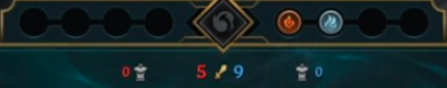

We will divide blueKills, blueDeahts and blueTotalGold into bins with equal data size so we can look at the relationship of these features and win rate.


In [194]:
kpi = ['blueWins', 'blueKills', 'blueDeaths', 'blueTotalGold', 'blueTowersDestroyed', 'blueDragons']
df_sa = df[kpi]
df_sa['blueKillsBin'] = pd.qcut(df_sa['blueKills'], q = 5)
df_sa['blueDeathsBin'] = pd.qcut(df_sa['blueDeaths'], q = 5)
df_sa['blueTotalGoldBin'] = pd.qcut(df_sa['blueTotalGold'], q = 5)
kpi_updated = ['blueWins', 'blueKillsBin', 'blueDeathsBin', 'blueTotalGoldBin', 'blueTowersDestroyed', 'blueDragons']
df_sa = df_sa[kpi_updated]

In [195]:
df_sa

,blueWins,blueKillsBin,blueDeathsBin,blueTotalGoldBin,blueTowersDestroyed,blueDragons
0,0,"(7.0, 9.0]","(5.0, 7.0]","(16796.0, 17737.4]",0,0
1,0,"(4.0, 5.0]","(4.0, 5.0]","(10729.999, 15195.0]",0,0
2,0,"(5.0, 7.0]","(9.0, 22.0]","(16010.8, 16796.0]",0,1
3,0,"(-0.001, 4.0]","(4.0, 5.0]","(10729.999, 15195.0]",0,0
4,0,"(5.0, 7.0]","(5.0, 7.0]","(16010.8, 16796.0]",0,0
...,...,...,...,...,...,...
9874,1,"(5.0, 7.0]","(-0.001, 4.0]","(17737.4, 23701.0]",0,1
9875,1,"(5.0, 7.0]","(-0.001, 4.0]","(16010.8, 16796.0]",0,1
9876,0,"(5.0, 7.0]","(5.0, 7.0]","(15195.0, 16010.8]",0,0
9877,0,"(-0.001, 4.0]","(-0.001, 4.0]","(10729.999, 15195.0]",0,1


In [196]:
target = ['blueWins']
group_1 = ['blueKillsBin', 'blueDeathsBin', 'blueTotalGoldBin', 'blueTowersDestroyed', 'blueDragons']
for x in group_1:
    print('Win Correlation by:', x)
    print(df_sa[[x, target[0]]].groupby(x).mean())
    print('-'*30, '\n')


Win Correlation by: blueKillsBin
               blueWins
blueKillsBin           
(-0.001, 4.0]  0.309585
(4.0, 5.0]     0.422427
(5.0, 7.0]     0.531707
(7.0, 9.0]     0.637734
(9.0, 22.0]    0.772263
------------------------------ 

Win Correlation by: blueDeathsBin
               blueWins
blueDeathsBin          
(-0.001, 4.0]  0.699677
(4.0, 5.0]     0.543624
(5.0, 7.0]     0.474809
(7.0, 9.0]     0.338902
(9.0, 22.0]    0.223263
------------------------------ 

Win Correlation by: blueTotalGoldBin
                      blueWins
blueTotalGoldBin              
(10729.999, 15195.0]  0.204856
(15195.0, 16010.8]    0.361519
(16010.8, 16796.0]    0.507840
(16796.0, 17737.4]    0.629179
(17737.4, 23701.0]    0.792004
------------------------------ 

Win Correlation by: blueTowersDestroyed
                     blueWins
blueTowersDestroyed          
0                    0.486458
1                    0.736597
2                    0.962963
3                    1.000000
4                    1.0

It is very clearly that these KPI features all have significant impacts on the outcome of the game. Next we weill look at how other features affect the win rate as well.

In [197]:
df_sa2 = df[['blueFirstBlood', 'blueHeralds', 'blueEliteMonsters', 'blueWins']]
group_2 = ['blueFirstBlood', 'blueHeralds', 'blueEliteMonsters']
for x in group_2:
    print('Win Correlation by:', x)
    print(df_sa2[[x, target[0]]].groupby(x).mean())
    print('-'*30, '\n')

Win Correlation by: blueFirstBlood
                blueWins
blueFirstBlood          
0               0.397179
1               0.598957
------------------------------ 

Win Correlation by: blueHeralds
             blueWins
blueHeralds          
0            0.476814
1            0.595046
------------------------------ 

Win Correlation by: blueEliteMonsters
                   blueWins
blueEliteMonsters          
0                  0.398565
1                  0.586344
2                  0.735211
------------------------------ 



## Data Visualization

### Total Gold and Gold Difference

Text(0.5, 1.0, 'blue Gold Difference Histogram')

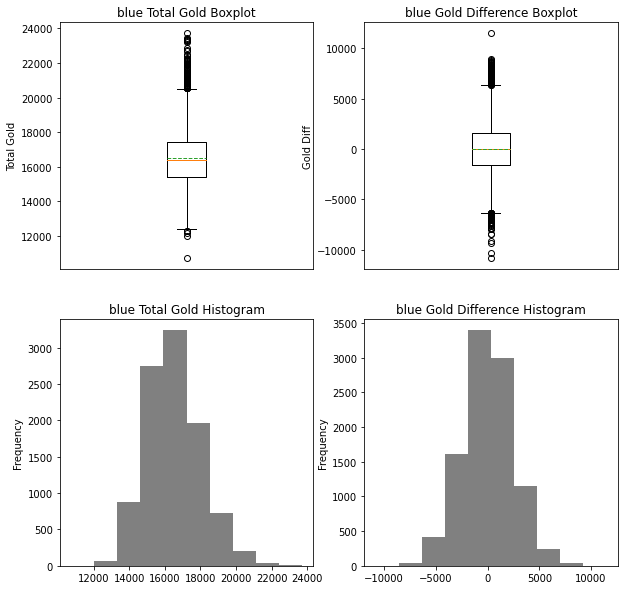

In [198]:
plt.figure(figsize=[10,10])

plt.subplot(221)
plt.boxplot(x=df['blueTotalGold'], showmeans = True, meanline = True)
plt.title('blue Total Gold Boxplot')
plt.ylabel('Total Gold')
plt.xticks([])


plt.subplot(222)
plt.boxplot(x=df['blueGoldDiff'], showmeans = True, meanline = True)
plt.title('blue Gold Difference Boxplot')
plt.ylabel('Gold Diff')
plt.xticks([])

plt.subplot(223)
df['blueTotalGold'].plot(kind = 'hist', color = 'grey')
plt.title('blue Total Gold Histogram')

plt.subplot(224)
df['blueGoldDiff'].plot(kind = 'hist', color = 'grey')
plt.title('blue Gold Difference Histogram')

Text(0.5, 0.98, 'Total Gold Distribution by blueWins')

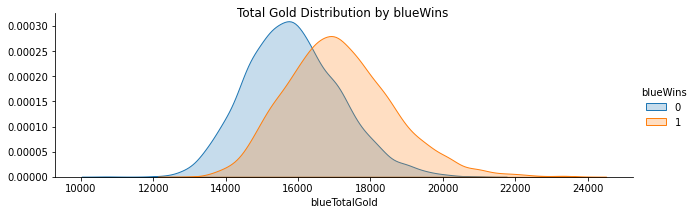

In [199]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueTotalGold', shade= True)
a.add_legend()
a.fig.suptitle('Total Gold Distribution by blueWins')

Text(0.5, 0.98, 'Total Gold Difference by blueWins')

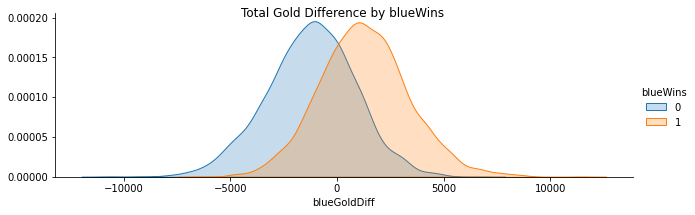

In [200]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueGoldDiff', shade= True )
a.add_legend()
a.fig.suptitle('Total Gold Difference by blueWins')

In [201]:
df_sa['blueTotalGoldBin'] = pd.qcut(df['blueTotalGold'], q = 20)
df_sa['blueGoldDiffBin'] = pd.qcut(df['blueGoldDiff'], q = 20)

In [202]:
groupbygold = df_sa[['blueTotalGoldBin', 'blueWins']].groupby('blueTotalGoldBin').mean()
groupbygolddiff = df_sa[['blueGoldDiffBin', 'blueWins']].groupby('blueGoldDiffBin').mean()

Text(1, 0.55, 'y = 0.5')

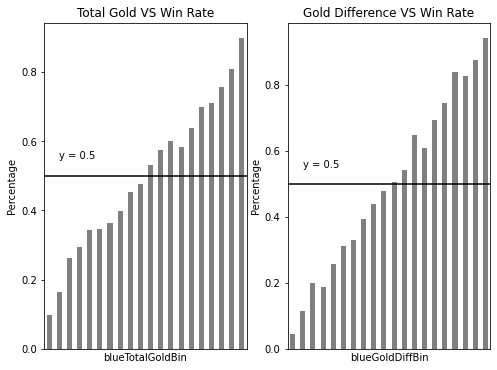

In [203]:
plt.figure(figsize=[8,6])

plt.subplot(121)
groupbygold['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Gold VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(122)
groupbygolddiff['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Gold Difference VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

### Total Experience, Experience Difference, and Average Level

Text(0.5, 1.0, 'blue Average Level Histogram')

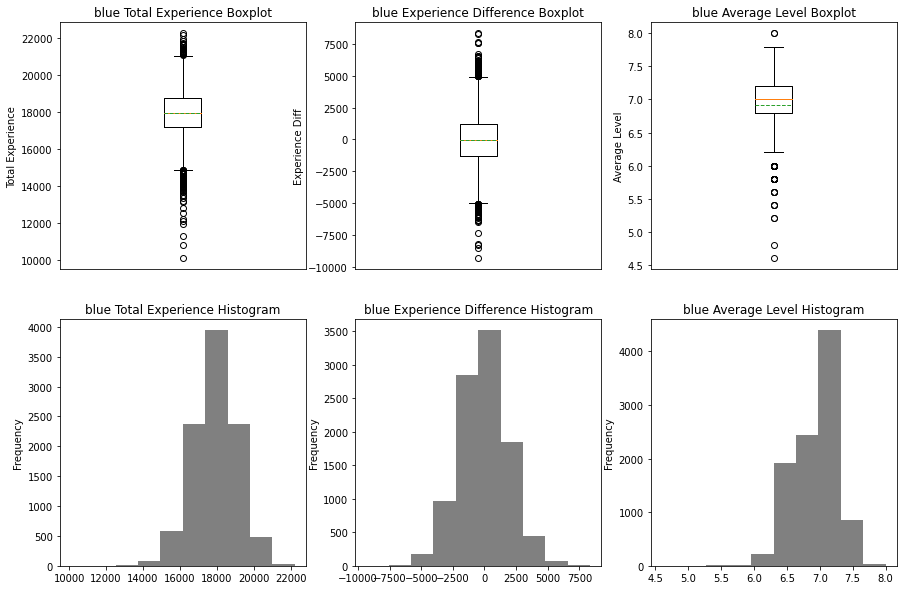

In [204]:
plt.figure(figsize=[15,10])

plt.subplot(231)
plt.boxplot(x=df['blueTotalExperience'], showmeans = True, meanline = True)
plt.title('blue Total Experience Boxplot')
plt.ylabel('Total Experience')
plt.xticks([])

plt.subplot(232)
plt.boxplot(x=df['blueExperienceDiff'], showmeans = True, meanline = True)
plt.title('blue Experience Difference Boxplot')
plt.ylabel('Experience Diff')
plt.xticks([])

plt.subplot(233)
plt.boxplot(x=df['blueAvgLevel'], showmeans = True, meanline = True)
plt.title('blue Average Level Boxplot')
plt.ylabel('Average Level')
plt.xticks([])

plt.subplot(234)
df['blueTotalExperience'].plot(kind = 'hist', color = 'grey')
plt.title('blue Total Experience Histogram')

plt.subplot(235)
df['blueExperienceDiff'].plot(kind = 'hist', color = 'grey')
plt.title('blue Experience Difference Histogram')

plt.subplot(236)
df['blueAvgLevel'].plot(kind = 'hist', color = 'grey')
plt.title('blue Average Level Histogram')

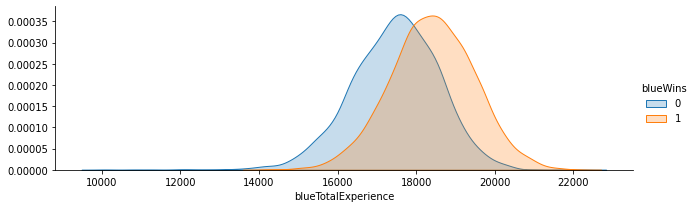

In [205]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueTotalExperience', shade= True )
a.add_legend()

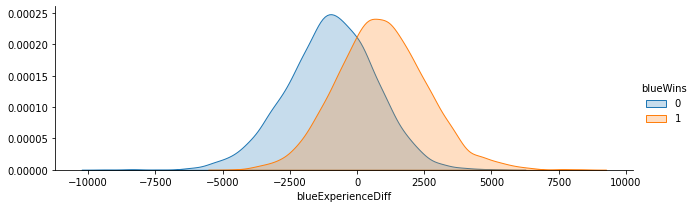

In [206]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueExperienceDiff', shade= True )
a.add_legend()

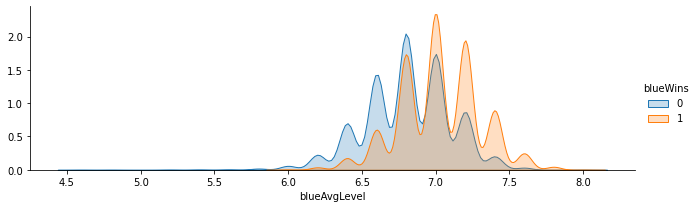

In [207]:
a = sns.FacetGrid(df, hue = 'blueWins', aspect = 3)
a.map(sns.kdeplot, 'blueAvgLevel', shade= True )
a.add_legend()

In [208]:
df_sa['blueTotalExperienceBin'] = pd.qcut(df['blueTotalExperience'], q = 20)
df_sa['blueExperienceDiffBin'] = pd.qcut(df['blueExperienceDiff'], q = 20)
df_sa['blueAvgLevelBin'] = pd.qcut(df['blueAvgLevel'], q = 5)
groupbyexp = df_sa[['blueTotalExperienceBin', 'blueWins']].groupby('blueTotalExperienceBin').mean()
groupbyexpdiff = df_sa[['blueExperienceDiffBin', 'blueWins']].groupby('blueExperienceDiffBin').mean()
groupbyavglevel = df_sa[['blueAvgLevelBin', 'blueWins']].groupby('blueAvgLevelBin').mean()

Text(1, 0.55, 'y = 0.5')

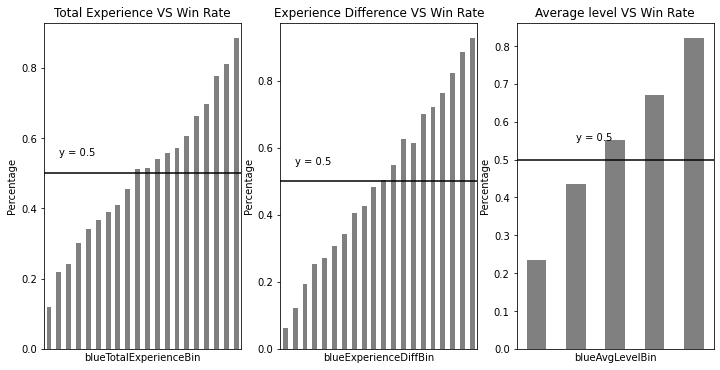

In [209]:
plt.figure(figsize=[12,6])

plt.subplot(131)
groupbyexp['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Experience VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(132)
groupbyexpdiff['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Experience Difference VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(133)
groupbyavglevel['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Average level VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))


### Kills, Deaths and Assists

Text(0.5, 1.0, 'blue Assists Histogram')

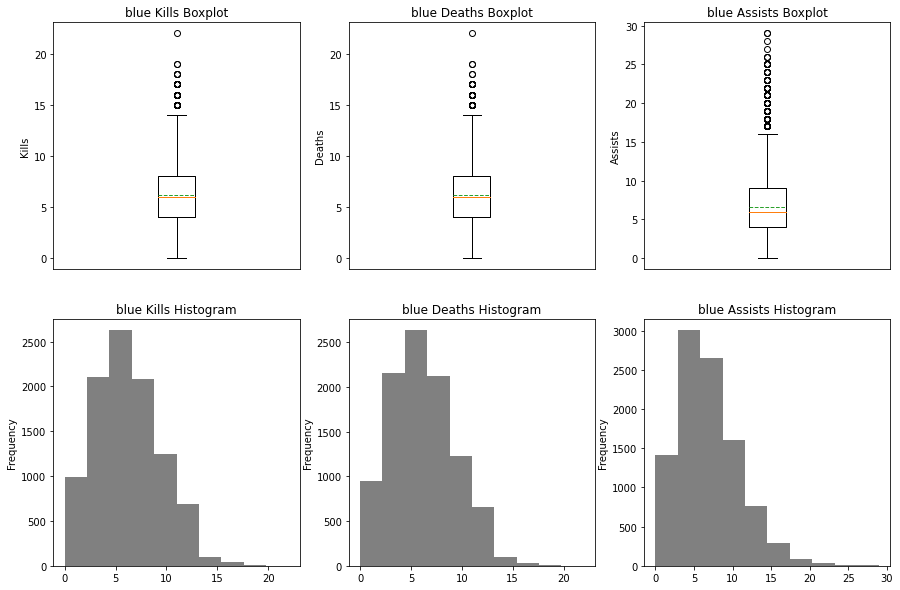

In [210]:
plt.figure(figsize=[15,10])

plt.subplot(231)
plt.boxplot(x=df['blueKills'], showmeans = True, meanline = True)
plt.title('blue Kills Boxplot')
plt.ylabel('Kills')
plt.xticks([])

plt.subplot(232)
plt.boxplot(x=df['blueDeaths'], showmeans = True, meanline = True)
plt.title('blue Deaths Boxplot')
plt.ylabel('Deaths')
plt.xticks([])

plt.subplot(233)
plt.boxplot(x=df['blueAssists'], showmeans = True, meanline = True)
plt.title('blue Assists Boxplot')
plt.ylabel('Assists')
plt.xticks([])

plt.subplot(234)
df['blueKills'].plot(kind = 'hist', color = 'grey')
plt.title('blue Kills Histogram')

plt.subplot(235)
df['blueDeaths'].plot(kind = 'hist', color = 'grey')
plt.title('blue Deaths Histogram')

plt.subplot(236)
df['blueAssists'].plot(kind = 'hist', color = 'grey')
plt.title('blue Assists Histogram')

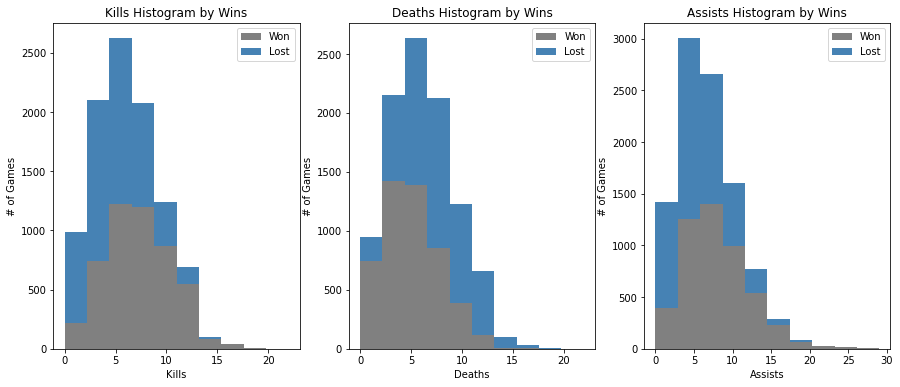

In [211]:
plt.figure(figsize=[15,6])

plt.subplot(131)
plt.hist(x = [df[df['blueWins']==1]['blueKills'], df[df['blueWins']==0]['blueKills']], 
         stacked=True, color = ['grey','steelblue'],label = ['Won','Lost'])
plt.title('Kills Histogram by Wins')
plt.xlabel('Kills')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(132)
plt.hist(x = [df[df['blueWins']==1]['blueDeaths'], df[df['blueWins']==0]['blueDeaths']], 
         stacked=True, color = ['grey','steelblue'] ,label = ['Won','Lost'])
plt.title('Deaths Histogram by Wins')
plt.xlabel('Deaths')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(133)
plt.hist(x = [df[df['blueWins']==1]['blueAssists'], df[df['blueWins']==0]['blueAssists']], 
         stacked=True, color = ['grey','steelblue'], label = ['Won','Lost'])
plt.title('Assists Histogram by Wins')
plt.xlabel('Assists')
plt.ylabel('# of Games')
plt.legend()

In [212]:
df_sa['blueKillsBin'] = pd.qcut(df['blueKills'], q = 5)
df_sa['blueDeathsBin'] = pd.qcut(df['blueDeaths'], q = 5)
df_sa['blueAssistsBin'] = pd.qcut(df['blueAssists'], q = 5)
groupbykills = df_sa[['blueKillsBin', 'blueWins']].groupby('blueKillsBin').mean()
groupbydeaths = df_sa[['blueDeathsBin', 'blueWins']].groupby('blueDeathsBin').mean()
groupbyassists = df_sa[['blueAssistsBin', 'blueWins']].groupby('blueAssistsBin').mean()

Text(1, 0.55, 'y = 0.5')

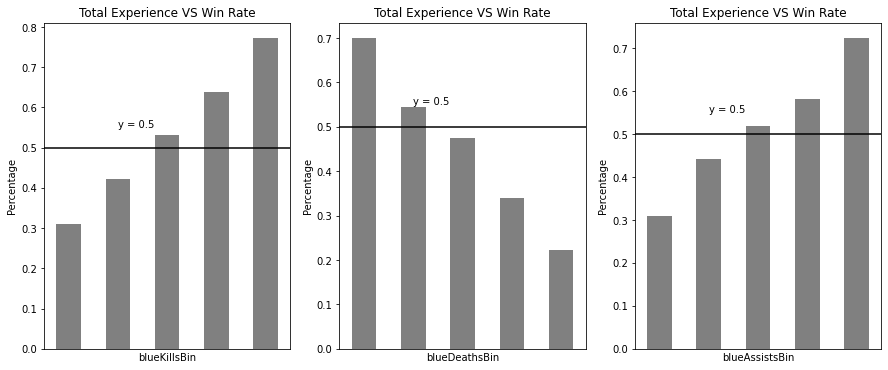

In [213]:
plt.figure(figsize=[15,6])

plt.subplot(131)
groupbykills['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Experience VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(132)
groupbydeaths['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Experience VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(133)
groupbyassists['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Experience VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

### First Blood

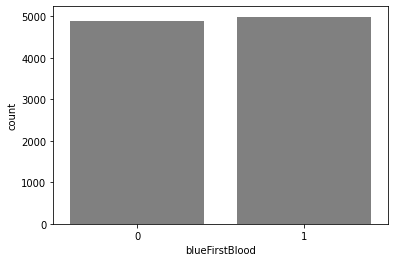

In [214]:
sns.countplot(df['blueFirstBlood'], color = 'grey')

Text(0.5, 1.0, 'Win Rate by First Blood')

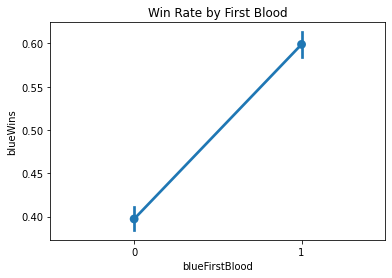

In [215]:
sns.pointplot(x = 'blueFirstBlood', y = 'blueWins',  data=df)
plt.title('Win Rate by First Blood')

### Wards Placed and Wards Destroyed

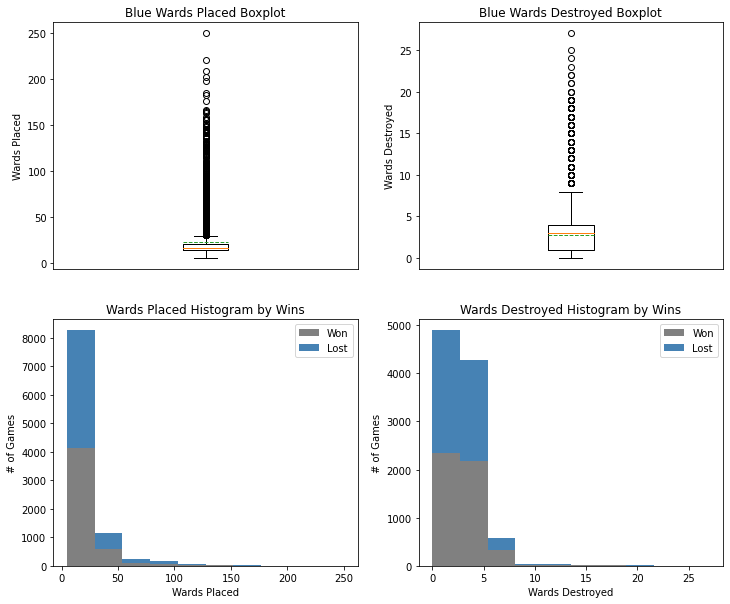

In [216]:
plt.figure(figsize=[12,10])

plt.subplot(221)
plt.boxplot(x=df['blueWardsPlaced'], showmeans = True, meanline = True)
plt.title('Blue Wards Placed Boxplot')
plt.ylabel('Wards Placed')
plt.xticks([])

plt.subplot(222)
plt.boxplot(x=df['blueWardsDestroyed'], showmeans = True, meanline = True)
plt.title('Blue Wards Destroyed Boxplot')
plt.ylabel('Wards Destroyed')
plt.xticks([])

plt.subplot(223)
plt.hist(x = [df[df['blueWins']==1]['blueWardsPlaced'], df[df['blueWins']==0]['blueWardsPlaced']], 
         stacked=True, color = ['grey','steelblue'], label = ['Won','Lost'])
plt.title('Wards Placed Histogram by Wins')
plt.xlabel('Wards Placed')
plt.ylabel('# of Games')
plt.legend()

plt.subplot(224)
plt.hist(x = [df[df['blueWins']==1]['blueWardsDestroyed'], df[df['blueWins']==0]['blueWardsDestroyed']], 
         stacked=True, color = ['grey','steelblue'], label = ['Won','Lost'])
plt.title('Wards Destroyed Histogram by Wins')
plt.xlabel('Wards Destroyed')
plt.ylabel('# of Games')
plt.legend()


### Elite Monsters (Dragons and Heralds) and Towers

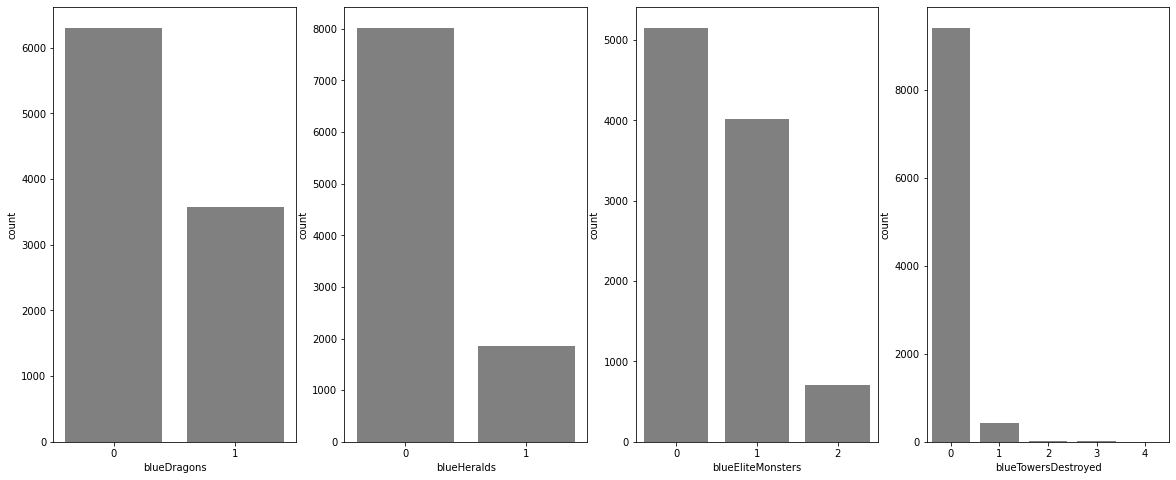

In [217]:
plt.figure(figsize=[20,8])

plt.subplot(141)
sns.countplot(df['blueDragons'], color = 'grey')
plt.subplot(142)
sns.countplot(df['blueHeralds'], color = 'grey')
plt.subplot(143)
sns.countplot(df['blueEliteMonsters'], color = 'grey')
plt.subplot(144)
sns.countplot(df['blueTowersDestroyed'], color = 'grey')

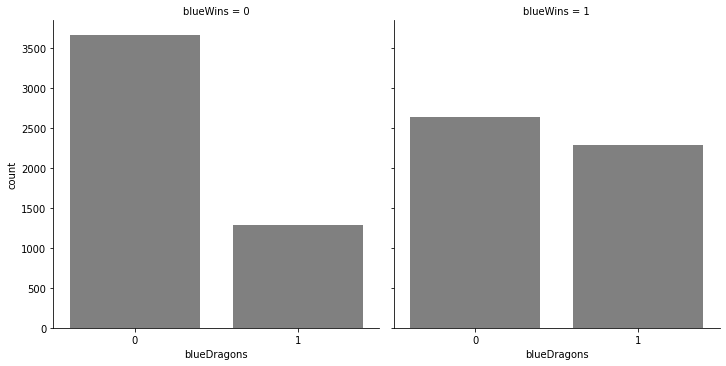

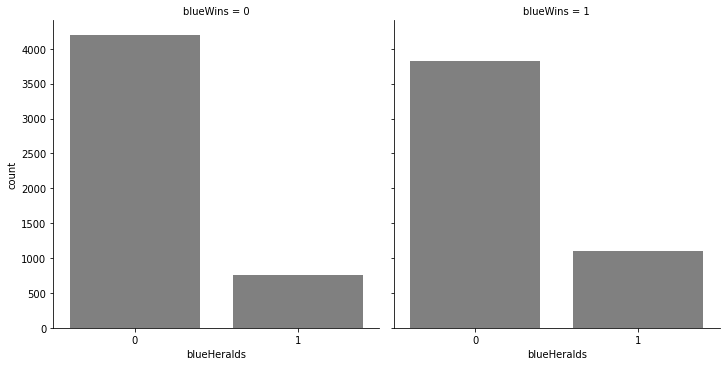

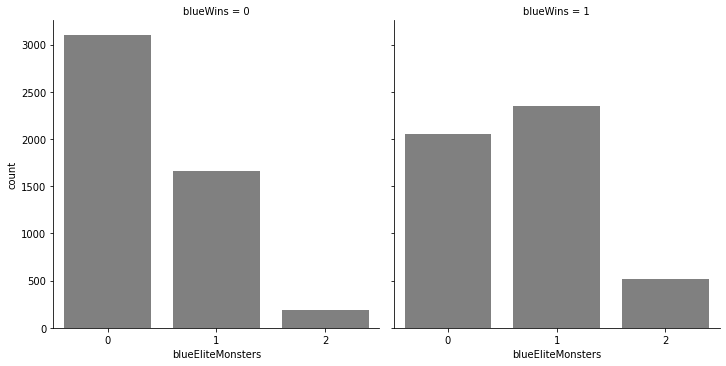

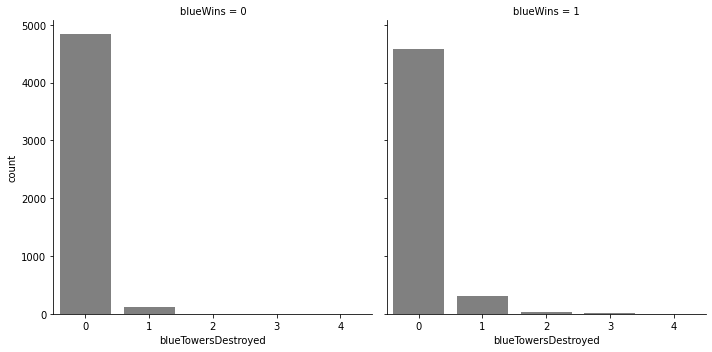

In [218]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
g = sns.catplot(x="blueDragons", col="blueWins", data=df, kind="count", color = 'grey')

ax2 = fig.add_subplot(222)
g = sns.catplot(x="blueHeralds", col="blueWins", data=df, kind="count", color = 'grey')

ax3 = fig.add_subplot(223)
g = sns.catplot(x="blueEliteMonsters", col="blueWins", data=df, kind="count", color = 'grey')

ax4 = fig.add_subplot(224)
g = sns.catplot(x="blueTowersDestroyed", col="blueWins", data=df, kind="count", color = 'grey')

plt.close(1)
plt.tight_layout()

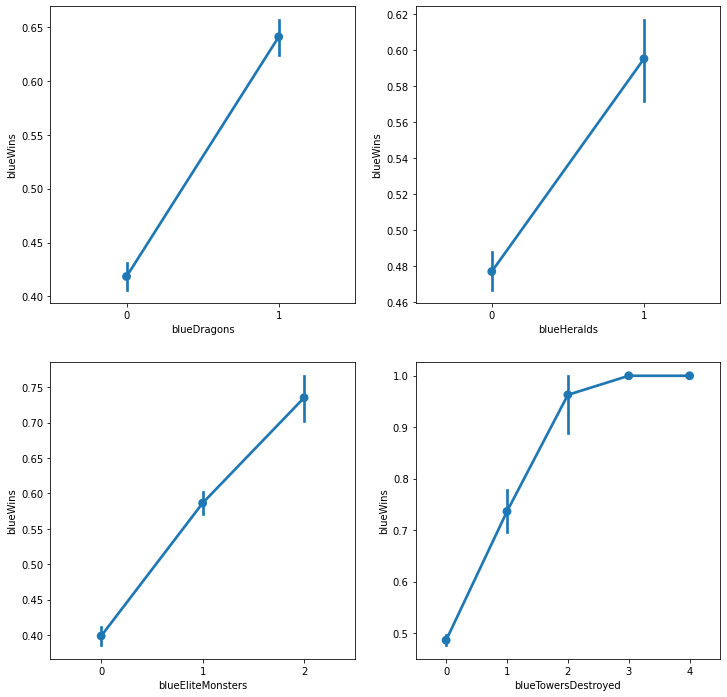

In [219]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))
sns.pointplot(x = 'blueDragons', y = 'blueWins',  data=df, ax = saxis[0,0])
sns.pointplot(x = 'blueHeralds', y = 'blueWins',  data=df, ax = saxis[0,1])
sns.pointplot(x = 'blueEliteMonsters', y = 'blueWins',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'blueTowersDestroyed', y = 'blueWins',  data=df, ax = saxis[1,1])

### Minions Killed

Text(0.5, 1.0, 'Blue Jungle Minions Killed Histogram')

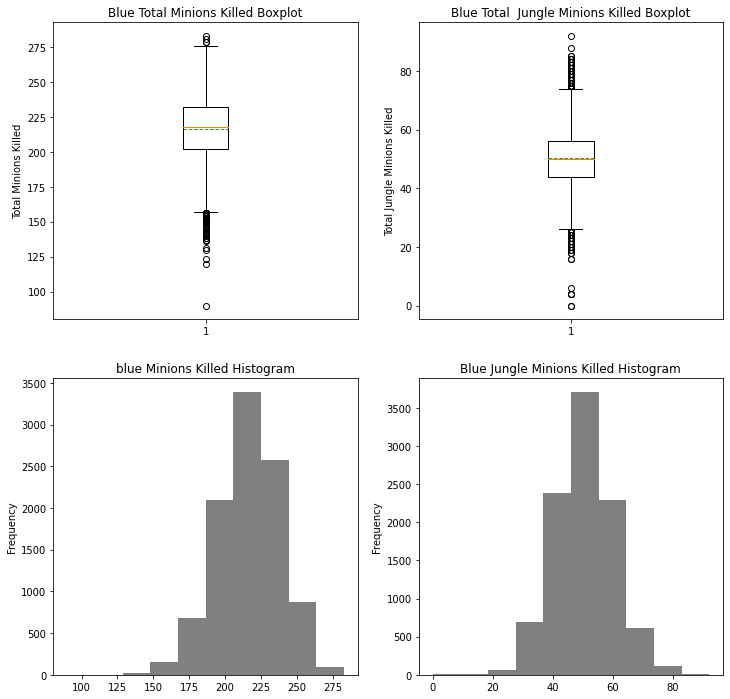

In [220]:
plt.figure(figsize=[12,12])

plt.subplot(221)
plt.boxplot(x=df['blueTotalMinionsKilled'], showmeans = True, meanline = True)
plt.title('Blue Total Minions Killed Boxplot')
plt.ylabel('Total Minions Killed')

plt.subplot(222)
plt.boxplot(x=df['blueTotalJungleMinionsKilled'], showmeans = True, meanline = True)
plt.title('Blue Total  Jungle Minions Killed Boxplot')
plt.ylabel('Total Jungle Minions Killed')


plt.subplot(223)
df['blueTotalMinionsKilled'].plot(kind = 'hist', color = 'grey')
plt.title('blue Minions Killed Histogram')

plt.subplot(224)
df['blueTotalJungleMinionsKilled'].plot(kind = 'hist', color = 'grey')
plt.title('Blue Jungle Minions Killed Histogram')


In [221]:
df_sa['blueTotalMinionsKilledBin'] = pd.qcut(df['blueTotalMinionsKilled'], q = 10)
df_sa['blueTotalJungleMinionsKilledBin'] = pd.qcut(df['blueTotalJungleMinionsKilled'], q = 10)
groupbyminions = df_sa[['blueTotalMinionsKilledBin', 'blueWins']].groupby('blueTotalMinionsKilledBin').mean()
groupbyjungleminions = df_sa[['blueTotalJungleMinionsKilledBin', 'blueWins']].groupby('blueTotalJungleMinionsKilledBin').mean()


Text(1, 0.55, 'y = 0.5')

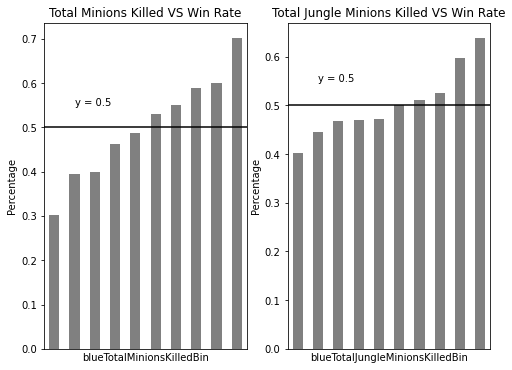

In [222]:
plt.figure(figsize=[8,6])

plt.subplot(121)
groupbyminions['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Minions Killed VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

plt.subplot(122)
groupbyjungleminions['blueWins'].plot(kind = 'bar', color = 'grey')
plt.title('Total Jungle Minions Killed VS Win Rate')
plt.ylabel('Percentage')
plt.xticks([])
plt.axhline(y=0.5, color='black', linestyle='-')
plt.annotate('y = 0.5', xy = (1, 0.55))

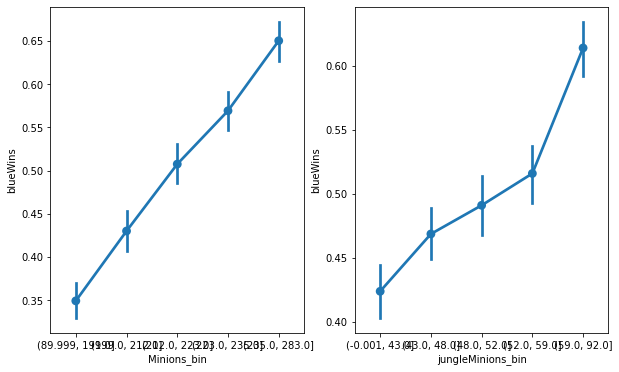

In [223]:
plt.figure(figsize=[10,6])
df_sa['Minions_bin'] = pd.qcut(df['blueTotalMinionsKilled'], 5)
df_sa['jungleMinions_bin'] = pd.qcut(df['blueTotalJungleMinionsKilled'], 5)
plt.subplot(121)
sns.pointplot(x = 'Minions_bin', y = 'blueWins',  data=df_sa)

plt.subplot(122)
sns.pointplot(x = 'jungleMinions_bin', y = 'blueWins',  data=df_sa)

### Grouped Features

In [224]:
df_select = df.loc[:, :'blueExperienceDiff'].drop(columns = ['blueWardsPlaced', 'blueWardsDestroyed'])
#sns.pairplot(df_select, hue="blueWins")

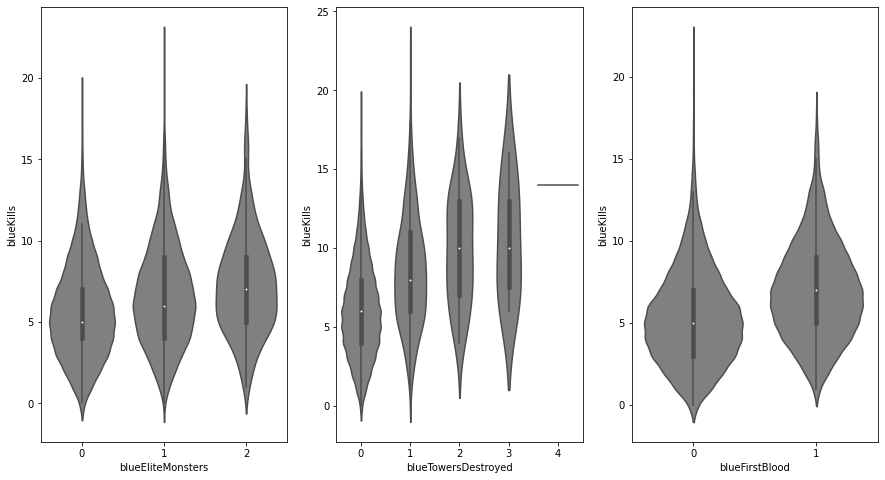

In [225]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(15,8))

sns.violinplot(x = 'blueEliteMonsters', y = 'blueKills', data = df, split = True, ax = axis1, color = 'grey')
sns.violinplot(x = 'blueTowersDestroyed', y = 'blueKills', data = df, split = True, ax = axis2, color = 'grey')
sns.violinplot(x = 'blueFirstBlood', y = 'blueKills', data = df, split = True, ax = axis3, color = 'grey')

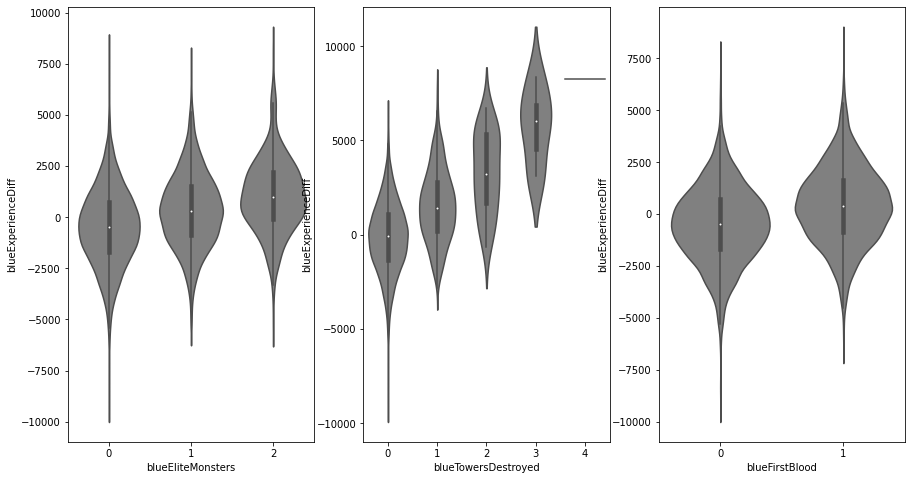

In [226]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(15,8))

sns.violinplot(x = 'blueEliteMonsters', y = 'blueExperienceDiff', data = df, split = True, ax = axis1, color = 'grey')
sns.violinplot(x = 'blueTowersDestroyed', y = 'blueExperienceDiff', data = df, split = True, ax = axis2, color = 'grey')
sns.violinplot(x = 'blueFirstBlood', y = 'blueExperienceDiff', data = df, split = True, ax = axis3, color = 'grey')

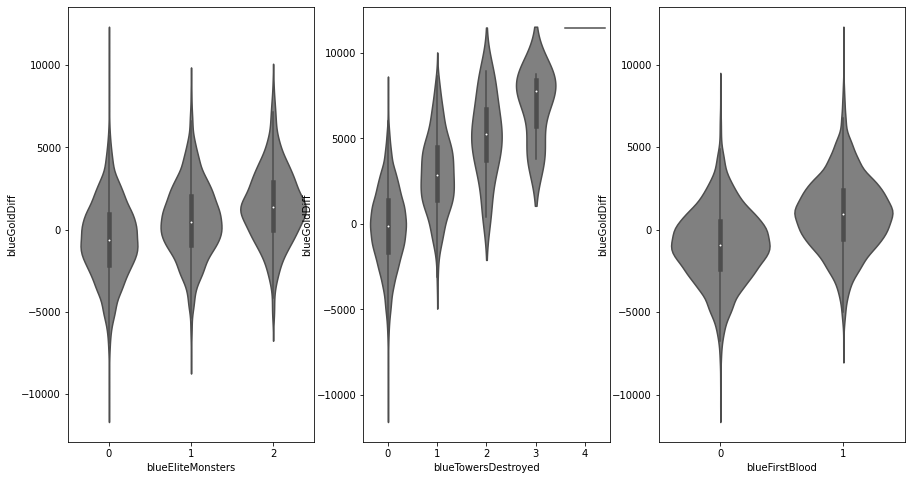

In [227]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,8))

sns.violinplot(x = 'blueEliteMonsters', y = 'blueGoldDiff', data = df, ax = axis1, color = 'grey')
sns.violinplot(x = 'blueTowersDestroyed', y = 'blueGoldDiff', data = df, ax = axis2, color = 'grey')
sns.violinplot(x = 'blueFirstBlood', y = 'blueGoldDiff', data = df, ax = axis3, color = 'grey')


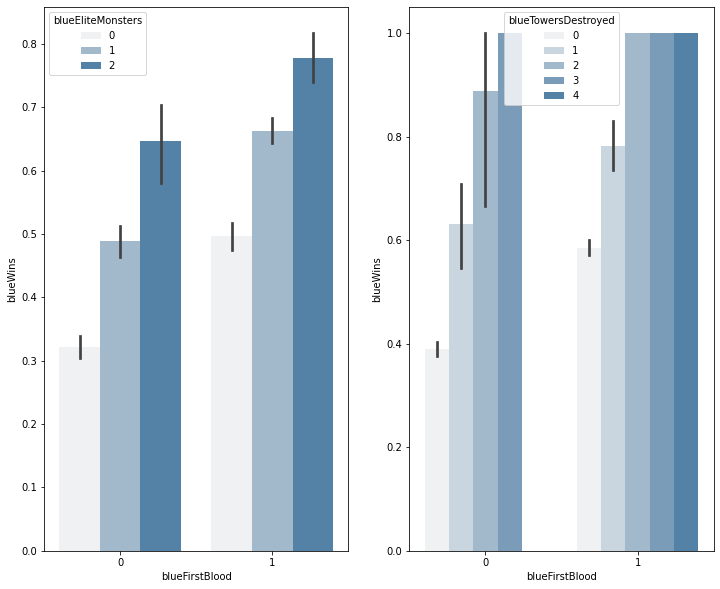

In [228]:
fig, qaxis = plt.subplots(1,2,figsize=(12,10))

sns.barplot(x = 'blueFirstBlood', y = 'blueWins', hue = 'blueEliteMonsters', data=df, ax = qaxis[0], color = 'steelblue')
sns.barplot(x = 'blueFirstBlood', y = 'blueWins', hue = 'blueTowersDestroyed', data=df, ax = qaxis[1], color = 'steelblue')

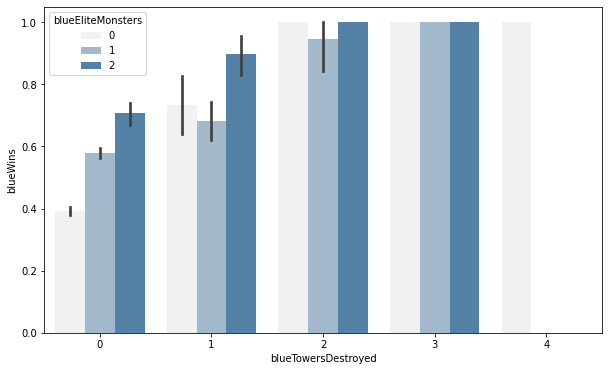

In [229]:
plt.figure(figsize=[10,6])
sns.barplot(x = 'blueTowersDestroyed', y = 'blueWins', hue = 'blueEliteMonsters', data=df, color = 'steelblue')

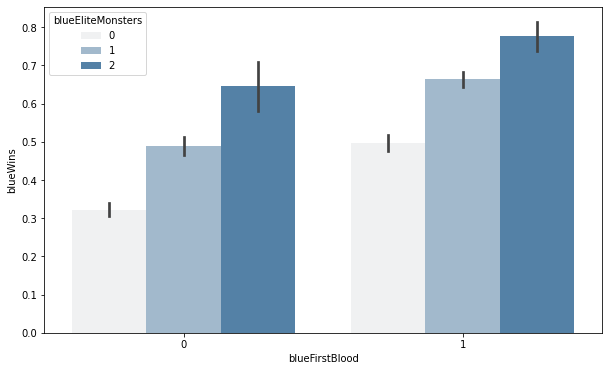

In [230]:
plt.figure(figsize=[10,6])
sns.barplot(x = 'blueFirstBlood', y = 'blueWins', hue = 'blueEliteMonsters', data=df, color = 'steelblue')

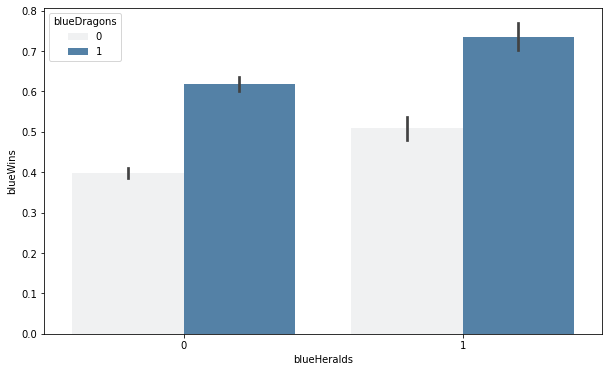

In [231]:
plt.figure(figsize=[10,6])
sns.barplot(x = 'blueHeralds', y = 'blueWins', hue = 'blueDragons', data=df, color = 'steelblue')

## EDA Observations
- Gold and Experience: these 2 features follow very similar pattern. They are both normally distributed and both have significant impact on winning the game. In winning games, blue team tends to have higher gold and Experience level. 
- Kills, Deaths, and Assists: these 3 features also play significant rules in winning the game. Unlike Gold and Experience, the distribution of these 3 features are slighly right skewed, meaning we have some very large values. 
- First Blood: from the graph, it seems like getting First Blood can give you a significant jump in winning the game. 
- Wards Placed and Destroyed: The distribution of these 2 features are even more right skewed than Kills, Deaths, and Assists. From the graph we cannot find any obvious relationship between the number of wards placed or destroyed and win rate. 
- Elite Monsters(Dragons and Heralds) and Towers: First of all, these resources are difficult to get in the first 10 minutes, especially for destroying Towers. Therefore, in most games the number of these features are 0. However, they do boost the win rate quite a lot based on data visualization. 
- Minions killed: From the graph, it also seems that the number of minions killed is positively associated with win rate,just like Gold and Experience. Considering minions are the main source of Gold and Experience, this result does make sense. 


# Model Building

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [235]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [236]:
df_model = df.drop(columns = ['blueWins', 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin', 'blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed'])
df_model.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')

## Data Preprocessing

### Define Features and Target 

In [237]:
X = df_model
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['blueWins']
print(X[:5])
print(y[:5])

[[ 9.90429438e-01  9.35300855e-01 -4.69261343e-02  1.07149547e+00
  -8.79230989e-01 -7.53225651e-01 -4.81132421e-01 -2.10439033e-01
   4.60178970e-01 -1.03563482e+00 -7.40639346e-01 -9.92781996e-01
  -1.46595148e+00  2.56228388e-01  1.33420105e-02 -9.90429438e-01
  -4.69261343e-02  9.35300855e-01  3.29496150e-01 -9.14893437e-01
  -8.38965673e-01 -4.36494946e-01 -1.98352875e-01  5.22926764e-02
  -4.10474889e-01 -7.63214598e-01 -9.28740596e-01  3.67684541e-01
  -2.56228388e-01 -1.33420105e-02]
 [-1.00966304e+00 -3.93216348e-01 -3.87796193e-01 -4.04768359e-01
  -8.79230989e-01 -7.53225651e-01 -4.81132421e-01 -2.10439033e-01
  -1.16679157e+00 -1.03563482e+00 -1.38539058e+00 -1.95355804e+00
  -7.58722267e-01 -1.19125400e+00 -5.93342484e-01  1.00966304e+00
  -3.87796193e-01 -3.93216348e-01 -1.14818826e+00  2.27770009e+00
   1.19194388e+00  2.29097727e+00  4.41230137e+00  7.58618713e-01
  -4.10474889e-01 -4.36979791e-01  1.03378350e+00  6.85036184e-02
   1.19125400e+00  5.93342484e-01]
 [-1.0

### Split Train and Test Dataset

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  7409
No. of samples in validation set: 2470


## Base-line Performance Using Cross-Validation

### Naive Bayes

In [239]:
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv_gnb)
print('Average Score is:', cv_gnb.mean())

[0.7294197  0.70782726 0.75573549 0.71862348 0.72788656]
Average Score is: 0.7278985002109492


### XGBoost

In [240]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv_xgb = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv_xgb)
print('Average Score is:', cv_xgb.mean())

[0.74021592 0.71524966 0.75843455 0.72874494 0.74004051]
Average Score is: 0.7365371174781603


### K-Nearest Neighbors

In [241]:
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,X_train,y_train,cv=5)
print(cv_knn)
print('Average Score is:',cv_knn.mean())

[0.70310391 0.67813765 0.69500675 0.68623482 0.69412559]
Average Score is: 0.6913217443442397


### Logistic Regression

In [242]:
lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr,X_train,y_train,cv=5)
print(cv_lr)
print('Average Score is:', cv_lr.mean())

[0.73819163 0.71659919 0.75236167 0.7219973  0.74814315]
Average Score is: 0.735458588818694


### SVC

In [243]:
svc = SVC(probability = True)
cv_svm = cross_val_score(svc,X_train,y_train,cv=5)
print(cv_svm)
print('Average Score is:', cv_svm.mean())

[0.73279352 0.70850202 0.75033738 0.72132254 0.72788656]
Average Score is: 0.7281684057440125


### Decision Tree

In [244]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,X_train,y_train,cv=5)
print(cv_dt)
print('Average Score is:', cv_dt.mean())

[0.63225371 0.63562753 0.64709852 0.63765182 0.64821067]
Average Score is: 0.6401684494829241


### Random Forest

In [245]:
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train,y_train,cv=5)
print(cv_rf)
print('Average Score is:', cv_rf.mean())

[0.72604588 0.71659919 0.72807018 0.72132254 0.72721134]
Average Score is: 0.7238498260922654


### Result Summary

In [246]:
result = {
  "Algorithm": ['Naive Bayes', 'XGBoost', 'KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
  "Baseline Score": [cv_gnb.mean(), cv_xgb.mean(), cv_knn.mean(), cv_lr.mean(), cv_svm.mean(), cv_dt.mean(), cv_rf.mean()]
}
pd.DataFrame(result).sort_values('Baseline Score', ascending = False)

,Algorithm,Baseline Score
1,XGBoost,0.736537
3,Logistic Regression,0.735459
4,SVM,0.728168
0,Naive Bayes,0.727899
6,Random Forest,0.723850
2,KNN,0.691322
5,Decision Tree,0.640168


## Feature Engineering

In [247]:
df_fe = df_model.copy()

### Generate New Features

In [248]:
df_fe.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')

In [249]:
df_fe['LevelDiff'] = df_fe['blueAvgLevel'] - df_fe['redAvgLevel']
df_fe['KillsDiff'] = df_fe['blueKills'] - df_fe['redKills']
df_fe['DeathsDiff'] = df_fe['blueDeaths'] - df_fe['redDeaths']
df_fe['AssistsDiff'] = df_fe['blueAssists'] - df_fe['redAssists']
df_fe['DragonsDiff'] = df_fe['blueDragons'] - df_fe['redDragons']
df_fe['HeraldsDiff'] = df_fe['blueHeralds'] - df_fe['redHeralds']
df_fe['TowersDiff'] = df_fe['blueTowersDestroyed'] - df_fe['redTowersDestroyed']
df_fe['MinionsDiff'] = df_fe['blueTotalMinionsKilled'] - df_fe['redTotalMinionsKilled']
df_fe['JungleMinionsDiff'] = df_fe['blueTotalJungleMinionsKilled'] - df_fe['redTotalJungleMinionsKilled']

In [250]:
df_fe2 = df_fe[['blueFirstBlood', 'LevelDiff', 'KillsDiff', 'DeathsDiff', 'AssistsDiff', 'DragonsDiff', 
           'HeraldsDiff', 'TowersDiff', 'MinionsDiff', 'JungleMinionsDiff', 'blueGoldDiff', 'blueExperienceDiff']]

In [251]:
X = df_fe2
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Shape of training set: ", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set:  (7409, 12)
Shape of test set: (2470, 12)


### Performance Summary After Feature Engineering

In [252]:
cv_gnb_fe = cross_val_score(gnb,X_train,y_train,cv=5)
cv_xgb_fe = cross_val_score(xgb,X_train,y_train,cv=5)
cv_knn_fe = cross_val_score(knn,X_train,y_train,cv=5)
cv_lr_fe = cross_val_score(lr,X_train,y_train,cv=5)
cv_svm_fe = cross_val_score(svc,X_train,y_train,cv=5)
cv_dt_fe = cross_val_score(dt,X_train,y_train,cv=5)
cv_rf_fe = cross_val_score(rf,X_train,y_train,cv=5)

In [253]:
result = {
  "Algorithm": ['Naive Bayes', 'XGBoost', 'KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
  "Baseline Score": [cv_gnb.mean(), cv_xgb.mean(), cv_knn.mean(), cv_lr.mean(), cv_svm.mean(), cv_dt.mean(), cv_rf.mean()], 
  'Score After F.E.': [cv_gnb_fe.mean(), cv_xgb_fe.mean(), cv_knn_fe.mean(), cv_lr_fe.mean(), cv_svm_fe.mean(), cv_dt_fe.mean(), cv_rf_fe.mean()]
}
pd.DataFrame(result).sort_values('Score After F.E.', ascending = False)

,Algorithm,Baseline Score,Score After F.E.
3,Logistic Regression,0.735459,0.735593
1,XGBoost,0.736537,0.731274
0,Naive Bayes,0.727899,0.731139
4,SVM,0.728168,0.730868
6,Random Forest,0.723850,0.717102
2,KNN,0.691322,0.689567
5,Decision Tree,0.640168,0.631258


## Feature Importance Analysis

In [254]:
df_fe2

,blueFirstBlood,LevelDiff,KillsDiff,DeathsDiff,AssistsDiff,DragonsDiff,HeraldsDiff,TowersDiff,MinionsDiff,JungleMinionsDiff,blueGoldDiff,blueExperienceDiff
0,1,-0.2,3,-3,3,0,0,0,-2,-19,643,-8
1,0,-0.2,0,0,3,-1,-1,-1,-66,-9,-2908,-1173
2,0,-0.4,-4,4,-10,1,0,0,-17,18,-1172,-1033
3,0,0.0,-1,1,-5,0,1,0,-34,8,-1321,-7
4,0,0.0,0,0,-1,-1,0,0,-15,-10,-1004,230
...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,0.4,3,-3,-2,1,0,0,-18,35,2519,2469
9875,0,0.2,2,-2,5,1,0,0,27,-8,782,888
9876,0,-0.4,-1,1,-6,-1,0,0,-51,-15,-2416,-1877
9877,1,-0.6,-1,1,2,1,0,0,-23,8,-839,-1085


### Random Forest Feature Impportance

In [255]:
df_fe2.rename(columns = {'blueGoldDiff': 'GoldDiff', 'blueExperienceDiff': 'ExperienceDiff', 'blueFirstBlood': 'FirstBlood'}, inplace = True)

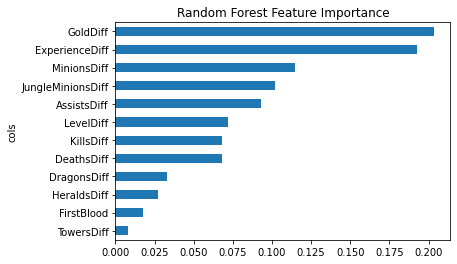

In [256]:
X = df_fe2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
rf.fit(X_train, y_train)
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})
feat_imp.set_index('cols', inplace = True)
feat_imp.plot(kind = 'barh', legend = False, title = 'Random Forest Feature Importance')
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Logistic Regression Featrue Importance

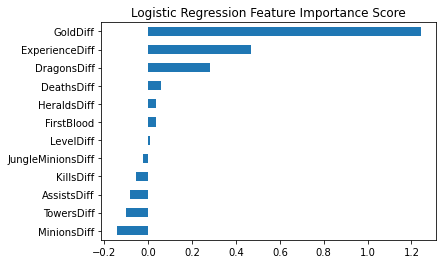

In [257]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
model = LogisticRegression()
model.fit(X, y)
importance = model.coef_[0]
pd.DataFrame(index = df_fe2.columns, data = importance).sort_values(by = 0, ascending = True).plot(kind = 'barh', legend = False, title = 'Logistic Regression Feature Importance Score')

### XGBoost Feature Importance

[18:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


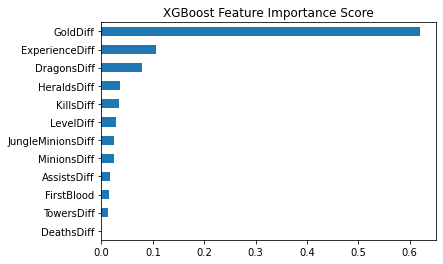

In [258]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
model = XGBRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
pd.DataFrame(index = df_fe2.columns, data = importance).sort_values(by = 0, ascending = True).plot(kind = 'barh', legend = False, title = 'XGBoost Feature Importance Score')

### Permutation Feature Importance

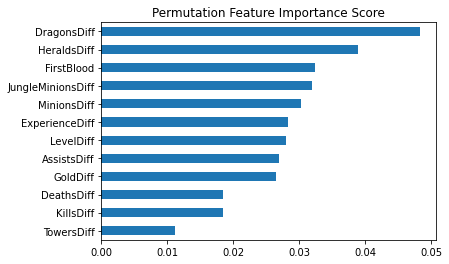

In [259]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
model = KNeighborsClassifier()
model.fit(X_train, y_train)
results = permutation_importance(model, X, y, scoring='accuracy')
importance = results.importances_mean
pd.DataFrame(index = df_fe2.columns, data = importance).sort_values(by = 0, ascending = True).plot(kind = 'barh', legend = False, title = 'Permutation Feature Importance Score')

# Model Tuning

In [260]:
from sklearn.model_selection import GridSearchCV 
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

### Logistic Regression

In [261]:
lr_tuned = LogisticRegression(random_state = 0)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf_lr = GridSearchCV(lr_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    5.2s


Logistic Regression
Best Score: 0.7376171041013431
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.0s finished


### XGBoost

In [262]:
xgb_tuned = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [100,500,1000],
    'colsample_bytree': [0.3,0.6,0.85],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'learning_rate':[0.01, 0.05],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 15.6min finished


XGB
Best Score: 0.734377964336385
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.01, 'min_child_weight': 0.01, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform'}


### Tuning Result

In [263]:
result = {
  "Algorithm": ['Naive Bayes', 'XGBoost', 'KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
  "Baseline Score": [cv_gnb.mean(), cv_xgb.mean(), cv_knn.mean(), cv_lr.mean(), cv_svm.mean(), cv_dt.mean(), cv_rf.mean()], 
  'Score After F.E.': [cv_gnb_fe.mean(), cv_xgb_fe.mean(), cv_knn_fe.mean(), cv_lr_fe.mean(), cv_svm_fe.mean(), cv_dt_fe.mean(), cv_rf_fe.mean()],
  'Score After Tuning': ['NA', best_clf_xgb.best_score_, 'NA', best_clf_lr.best_score_, 'NA', 'NA', 'NA']
}
pd.DataFrame(result).sort_values(by = 'Score After F.E.', ascending = False)

,Algorithm,Baseline Score,Score After F.E.,Score After Tuning
3,Logistic Regression,0.735459,0.735593,0.737617
1,XGBoost,0.736537,0.731274,0.734378
0,Naive Bayes,0.727899,0.731139,NA
4,SVM,0.728168,0.730868,NA
6,Random Forest,0.723850,0.717102,NA
2,KNN,0.691322,0.689567,NA
5,Decision Tree,0.640168,0.631258,NA


# Conclusion
In this project, we've performed both basic statistical analysis and data visualization to get the insights from the data. Then we selected features of interest based on previous steps for building the model. Before feeding data into machine learning models, we performed data scaling in order to achieve better performance scores. The machine learning algorithms we chose for this project are Naive Bayes, XGBoost, K-Nearest Neighbors, Logistic Regression, SVC, Decision Tree, and Random Forest. We fed preprocessed data into these models and get the baseline performance socre for each algorithm. For feature engineering, instead of using data from blue team and red team, we substrated red team data from blue team data to create new features. Then we used newly created features to train these models and achieved slightly better scores for most of machine learning models that we picked. Finally we picked Logistic Regression and XGBoost for fine-tuning the model. We were able to achieve around 74% accuracy, which is a decent result considering we only have data for the first 10 minutes of a game. 

For feature importance analysis, we got different results from different feature importance methods. Based on the result, Gold and Experience are definitely the most important feature in the first 10 minutes of a game. A big change in S10 is the change of Dragons, this project also confirmed that. Most of feature importance analysis showed that killing dragon in the first 10 minutes can increase the win rate. 

Surprisingly, Kills and Heralds are not as important as I expected in early games, which does make sense since getting a Kill or Heralds in early games usually require sacricifing lane minions. The take-away message here for most players will be: just farm in the first 10 minutes and don't die.   